In [ ]:
import tensorflow as tf
import os
import kagglehub
# confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

In [2]:
# Download latest version
path = kagglehub.dataset_download("sudarshanvaidya/random-images-for-face-emotion-recognition")

print("Path to dataset files:", path)

Path to dataset files: /Users/macos/.cache/kagglehub/datasets/sudarshanvaidya/random-images-for-face-emotion-recognition/versions/1


In [3]:
# list files in path
import os
for root, dirs, files in os.walk(path):
    for dir in dirs:
        print(dir)

contempt
fear
surprise
sadness
neutrality
happiness
anger
disgust


In [4]:
def create_image_dataset(path, image_size=(224, 224), batch_size=32, subset="training"):
    """Create a TensorFlow dataset from image directory structure"""

    dataset = tf.keras.utils.image_dataset_from_directory(
        path,
        labels='inferred',  # infer labels from subdirectory names
        label_mode='categorical',  # or 'int' for integer labels
        class_names=["contempt", "fear", "surprise", "sadness", "neutrality", "happiness", "anger", "disgust"],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=image_size,
        shuffle=True,
        seed=123,
        validation_split=0.2,  # optional: split for validation
        subset=subset  # "training" or "validation"
    )

    # Normalize pixel values to [0,1]
    normalization_layer = tf.keras.layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    # Optimize performance
    dataset = dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

# Usage
dataset = create_image_dataset(path, image_size=(224, 224), batch_size=32)

# Iterate over dataset
for images, labels in dataset.take(1):  # take(1) to get just first batch
    print("Batch of images shape:", images.shape)
    print("Batch of labels shape:", labels.shape)
    print("Labels:", labels.numpy())
    break

Found 5558 files belonging to 8 classes.
Using 4447 files for training.
Batch of images shape: (32, 224, 224, 3)
Batch of labels shape: (32, 8)
Labels: [[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 

2025-06-19 21:28:16.055445: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [8]:
# Train a simple model
def create_model(input_shape=(224, 224, 3), num_classes=8):
    """Create a simple CNN model for image classification"""
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),

        layers.Dense(num_classes, activation='softmax')  # 7 emotion classes
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and train the model
model = create_model(input_shape=(224, 224, 3), num_classes=8)
# Train the model
model.fit(dataset, epochs=10)  # Adjust epochs as needed
# Save the model
model.save('face_emotion_recognition_model_01_cnn001.h5')


Epoch 1/10


2025-06-19 21:32:01.500069: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:01.503903: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:01.505236: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:01.510417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:01.518187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:01.567102: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19

  6/139 ━━━━━━━━━━━━━━━━━━━━ 1:09 523ms/step - accuracy: 0.1509 - loss: 21.7108

2025-06-19 21:32:04.912085: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  7/139 ━━━━━━━━━━━━━━━━━━━━ 1:09 523ms/step - accuracy: 0.1523 - loss: 21.9864

2025-06-19 21:32:05.427488: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:05.438173: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  8/139 ━━━━━━━━━━━━━━━━━━━━ 1:08 525ms/step - accuracy: 0.1523 - loss: 22.0557

2025-06-19 21:32:05.969715: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 10/139 ━━━━━━━━━━━━━━━━━━━━ 1:08 534ms/step - accuracy: 0.1550 - loss: 21.8723

2025-06-19 21:32:07.101986: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 13/139 ━━━━━━━━━━━━━━━━━━━━ 1:06 531ms/step - accuracy: 0.1583 - loss: 21.2648

2025-06-19 21:32:08.643530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:08.643808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:08.644386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 14/139 ━━━━━━━━━━━━━━━━━━━━ 1:06 529ms/step - accuracy: 0.1597 - loss: 21.0737

2025-06-19 21:32:09.150839: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 15/139 ━━━━━━━━━━━━━━━━━━━━ 1:06 533ms/step - accuracy: 0.1614 - loss: 20.8651

2025-06-19 21:32:09.757309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/139 ━━━━━━━━━━━━━━━━━━━━ 1:05 535ms/step - accuracy: 0.1631 - loss: 20.6677

2025-06-19 21:32:10.303001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 19/139 ━━━━━━━━━━━━━━━━━━━━ 1:04 536ms/step - accuracy: 0.1667 - loss: 20.0741

2025-06-19 21:32:11.934934: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:11.952064: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 22/139 ━━━━━━━━━━━━━━━━━━━━ 1:02 536ms/step - accuracy: 0.1686 - loss: 19.4640

2025-06-19 21:32:13.525733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 28/139 ━━━━━━━━━━━━━━━━━━━━ 59s 537ms/step - accuracy: 0.1710 - loss: 18.2187 

2025-06-19 21:32:16.792661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 30/139 ━━━━━━━━━━━━━━━━━━━━ 59s 541ms/step - accuracy: 0.1710 - loss: 17.8304

2025-06-19 21:32:17.987554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 35/139 ━━━━━━━━━━━━━━━━━━━━ 56s 546ms/step - accuracy: 0.1711 - loss: 16.9120

2025-06-19 21:32:20.840513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 41/139 ━━━━━━━━━━━━━━━━━━━━ 53s 550ms/step - accuracy: 0.1715 - loss: 15.9176

2025-06-19 21:32:24.275353: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 42/139 ━━━━━━━━━━━━━━━━━━━━ 53s 549ms/step - accuracy: 0.1718 - loss: 15.7642

2025-06-19 21:32:24.822395: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 43/139 ━━━━━━━━━━━━━━━━━━━━ 52s 549ms/step - accuracy: 0.1720 - loss: 15.6143

2025-06-19 21:32:25.349817: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 48/139 ━━━━━━━━━━━━━━━━━━━━ 49s 549ms/step - accuracy: 0.1735 - loss: 14.9098

2025-06-19 21:32:28.080810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 52/139 ━━━━━━━━━━━━━━━━━━━━ 47s 550ms/step - accuracy: 0.1750 - loss: 14.3973

2025-06-19 21:32:30.340801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:30.345087: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:30.345755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 54/139 ━━━━━━━━━━━━━━━━━━━━ 46s 550ms/step - accuracy: 0.1757 - loss: 14.1570

2025-06-19 21:32:31.417264: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 57/139 ━━━━━━━━━━━━━━━━━━━━ 45s 551ms/step - accuracy: 0.1769 - loss: 13.8145

2025-06-19 21:32:33.120655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/139 ━━━━━━━━━━━━━━━━━━━━ 43s 550ms/step - accuracy: 0.1782 - loss: 13.4923

2025-06-19 21:32:34.751828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 62/139 ━━━━━━━━━━━━━━━━━━━━ 42s 550ms/step - accuracy: 0.1791 - loss: 13.2880

2025-06-19 21:32:35.826055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:35.826923: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/139 ━━━━━━━━━━━━━━━━━━━━ 41s 551ms/step - accuracy: 0.1800 - loss: 13.0914

2025-06-19 21:32:37.032032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 68/139 ━━━━━━━━━━━━━━━━━━━━ 39s 552ms/step - accuracy: 0.1817 - loss: 12.7200

2025-06-19 21:32:39.260335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 71/139 ━━━━━━━━━━━━━━━━━━━━ 37s 551ms/step - accuracy: 0.1830 - loss: 12.4592

2025-06-19 21:32:40.892451: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 74/139 ━━━━━━━━━━━━━━━━━━━━ 35s 552ms/step - accuracy: 0.1845 - loss: 12.2121

2025-06-19 21:32:42.581160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 78/139 ━━━━━━━━━━━━━━━━━━━━ 33s 551ms/step - accuracy: 0.1864 - loss: 11.9021

2025-06-19 21:32:44.750089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/139 ━━━━━━━━━━━━━━━━━━━━ 31s 551ms/step - accuracy: 0.1877 - loss: 11.6830

2025-06-19 21:32:46.362973: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 82/139 ━━━━━━━━━━━━━━━━━━━━ 31s 551ms/step - accuracy: 0.1881 - loss: 11.6123

2025-06-19 21:32:46.942144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:46.947565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 83/139 ━━━━━━━━━━━━━━━━━━━━ 30s 552ms/step - accuracy: 0.1885 - loss: 11.5428

2025-06-19 21:32:47.569532: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 86/139 ━━━━━━━━━━━━━━━━━━━━ 29s 552ms/step - accuracy: 0.1897 - loss: 11.3410

2025-06-19 21:32:49.243891: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:49.262058: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 87/139 ━━━━━━━━━━━━━━━━━━━━ 28s 553ms/step - accuracy: 0.1901 - loss: 11.2758

2025-06-19 21:32:49.793019: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 88/139 ━━━━━━━━━━━━━━━━━━━━ 28s 553ms/step - accuracy: 0.1905 - loss: 11.2117

2025-06-19 21:32:50.399354: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:50.426871: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 91/139 ━━━━━━━━━━━━━━━━━━━━ 26s 555ms/step - accuracy: 0.1916 - loss: 11.0250

2025-06-19 21:32:52.236390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:52.237050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 95/139 ━━━━━━━━━━━━━━━━━━━━ 24s 556ms/step - accuracy: 0.1930 - loss: 10.7891

2025-06-19 21:32:54.584888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 98/139 ━━━━━━━━━━━━━━━━━━━━ 22s 558ms/step - accuracy: 0.1940 - loss: 10.6210

2025-06-19 21:32:56.400977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:32:56.403140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 99/139 ━━━━━━━━━━━━━━━━━━━━ 22s 558ms/step - accuracy: 0.1943 - loss: 10.5666

2025-06-19 21:32:57.019289: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


100/139 ━━━━━━━━━━━━━━━━━━━━ 21s 558ms/step - accuracy: 0.1946 - loss: 10.5130

2025-06-19 21:32:57.532852: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


103/139 ━━━━━━━━━━━━━━━━━━━━ 20s 558ms/step - accuracy: 0.1955 - loss: 10.3565

2025-06-19 21:32:59.262262: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


104/139 ━━━━━━━━━━━━━━━━━━━━ 19s 559ms/step - accuracy: 0.1958 - loss: 10.3058

2025-06-19 21:32:59.831228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


106/139 ━━━━━━━━━━━━━━━━━━━━ 18s 559ms/step - accuracy: 0.1964 - loss: 10.2064

2025-06-19 21:33:00.992152: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:33:00.994597: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


107/139 ━━━━━━━━━━━━━━━━━━━━ 17s 560ms/step - accuracy: 0.1967 - loss: 10.1578

2025-06-19 21:33:01.601162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:33:01.614961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/139 ━━━━━━━━━━━━━━━━━━━━ 17s 560ms/step - accuracy: 0.1970 - loss: 10.1097

2025-06-19 21:33:02.214599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:33:02.219322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


109/139 ━━━━━━━━━━━━━━━━━━━━ 16s 560ms/step - accuracy: 0.1973 - loss: 10.0623

2025-06-19 21:33:02.792731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


111/139 ━━━━━━━━━━━━━━━━━━━━ 15s 561ms/step - accuracy: 0.1978 - loss: 9.9694 

2025-06-19 21:33:03.988767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


112/139 ━━━━━━━━━━━━━━━━━━━━ 15s 561ms/step - accuracy: 0.1981 - loss: 9.9238

2025-06-19 21:33:04.523479: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:33:04.532092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:33:04.532649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:33:04.539660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


114/139 ━━━━━━━━━━━━━━━━━━━━ 14s 561ms/step - accuracy: 0.1986 - loss: 9.8344

2025-06-19 21:33:05.660964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


116/139 ━━━━━━━━━━━━━━━━━━━━ 12s 562ms/step - accuracy: 0.1991 - loss: 9.7473

2025-06-19 21:33:06.868601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:33:06.874582: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/139 ━━━━━━━━━━━━━━━━━━━━ 11s 563ms/step - accuracy: 0.1996 - loss: 9.6624

2025-06-19 21:33:08.125977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


121/139 ━━━━━━━━━━━━━━━━━━━━ 10s 564ms/step - accuracy: 0.2003 - loss: 9.5388

2025-06-19 21:33:09.927864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


124/139 ━━━━━━━━━━━━━━━━━━━━ 8s 565ms/step - accuracy: 0.2010 - loss: 9.4197

2025-06-19 21:33:11.753293: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:33:11.758764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/139 ━━━━━━━━━━━━━━━━━━━━ 7s 565ms/step - accuracy: 0.2013 - loss: 9.3809

2025-06-19 21:33:12.369720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


127/139 ━━━━━━━━━━━━━━━━━━━━ 6s 565ms/step - accuracy: 0.2017 - loss: 9.3048

2025-06-19 21:33:13.437144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


129/139 ━━━━━━━━━━━━━━━━━━━━ 5s 565ms/step - accuracy: 0.2021 - loss: 9.2304

2025-06-19 21:33:14.582624: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


139/139 ━━━━━━━━━━━━━━━━━━━━ 80s 565ms/step - accuracy: 0.2044 - loss: 8.8501
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 75s 543ms/step - accuracy: 0.2534 - loss: 2.0455
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 78s 563ms/step - accuracy: 0.2540 - loss: 2.0238
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 77s 553ms/step - accuracy: 0.2538 - loss: 2.0063
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 75s 538ms/step - accuracy: 0.2540 - loss: 1.9939
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 74s 533ms/step - accuracy: 0.2540 - loss: 1.9861
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 75s 540ms/step - accuracy: 0.2536 - loss: 1.9810
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 75s 541ms/step - accuracy: 0.2545 - loss: 1.9789
Epoch 9/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 77s 553ms/step - accuracy: 0.2540 - loss: 1.9730
Epoch 10/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 76s 545ms/step - accuracy: 0.2540 - loss: 1.9686


Found 5558 files belonging to 8 classes.
Using 1111 files for validation.
 1/35 ━━━━━━━━━━━━━━━━━━━━ 11s 327ms/step - accuracy: 0.2188 - loss: 1.9201

2025-06-19 21:48:13.960509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:48:13.980178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:48:13.992966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:48:14.026845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2025-06-19 21:48:14.026899: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:48:14.058661: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:48:14.063709: W tenso

 6/35 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.2417 - loss: 1.9674

2025-06-19 21:48:14.462670: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


12/35 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.2584 - loss: 1.9635

2025-06-19 21:48:15.123081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:48:15.228737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


13/35 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.2588 - loss: 1.9641

2025-06-19 21:48:15.341029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:48:15.463892: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:48:15.468267: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:48:15.469292: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2025-06-19 21:48:15.469399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


15/35 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.2584 - loss: 1.9658

2025-06-19 21:48:15.583567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


25/35 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.2566 - loss: 1.9699

2025-06-19 21:48:16.675755: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-19 21:48:16.782086: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.2586 - loss: 1.9685
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

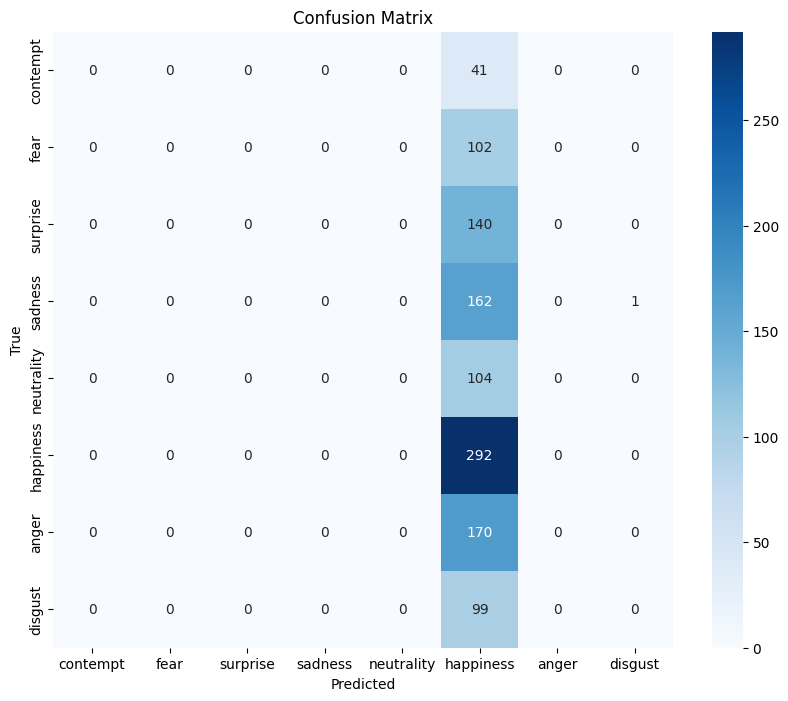

In [13]:
model_name = 'face_emotion_recognition_model_01_cnn001.h5'
# Load the model
loaded_model = tf.keras.models.load_model(model_name)
# Evaluate the model
# Note: You would typically have a separate validation dataset for evaluation
validation_dataset = create_image_dataset(path, image_size=(224, 224), batch_size=32, subset="validation")
results = loaded_model.evaluate(validation_dataset)

# Note: The class index corresponds to the order in class_names
class_names = ["contempt", "fear", "surprise", "sadness", "neutrality", "happiness", "anger", "disgust"]

# Example usage of predict_image

def confusion_matrix_plot(model, validation_dataset, class_names):
    """Plot confusion matrix for model predictions on validation dataset"""
    y_true = []
    y_pred = []

    for images, labels in validation_dataset:
        predictions = model.predict(images)
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
# Plot confusion matrix
confusion_matrix_plot(loaded_model, validation_dataset, class_names)
